In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("./data/formatted_health_data.csv")

In [3]:
data.drop(columns=['Unnamed: 73'], axis = 1)
data.head()

,itching,skin_rash,continuous_sneezing,shivering,stomach_pain,acidity,vomiting,indigestion,muscle_wasting,patches_in_throat,...,receiving_unsterile_injections,coma,sinus_pressure,palpitations,stomach_bleeding,runny_nose,congestion,blood_in_sputum,loss_of_smell,disease
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [4]:
for col in data.columns:
    data = data.rename(columns={col:col.strip()})

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
training_data = data.iloc[:, :-1]
training_labels = data['disease']

In [7]:
train_set, test_set, train_labels, test_labels = train_test_split(training_data, training_labels, random_state =0, test_size= 0.20)

In [40]:
train_labels.head()

613          Hepatitis B
4155            Jaundice
3803      Hypothyroidism
3321    Fungal infection
3790             Typhoid
Name: disease, dtype: object

In [8]:
train_dist = train_labels.value_counts(sort=False)
train_dist

Alcoholic hepatitis                         96
Drug Reaction                               93
Hypertension                               100
Hypothyroidism                              97
Peptic ulcer diseae                         96
Hypoglycemia                               107
Dengue                                     102
Urinary tract infection                    100
Gastroenteritis                             94
Jaundice                                    94
Common Cold                                 86
Fungal infection                            96
Hyperthyroidism                             97
Osteoarthristis                             97
Chicken pox                                 99
(vertigo) Paroymsal  Positional Vertigo    102
Hepatitis D                                 92
Hepatitis E                                 98
Pneumonia                                   97
Bronchial Asthma                            92
Hepatitis B                                101
Psoriasis    

In [9]:
test_dist = test_labels.value_counts(sort=False)
test_dist

Urinary tract infection                    20
Jaundice                                   26
Alcoholic hepatitis                        24
Drug Reaction                              27
Malaria                                    25
Chronic cholestasis                        21
Hypertension                               20
Hepatitis C                                17
Peptic ulcer diseae                        24
Tuberculosis                               24
Common Cold                                34
Fungal infection                           24
Hyperthyroidism                            23
Hepatitis B                                19
Allergy                                    23
Hypothyroidism                             23
Heart attack                               32
Typhoid                                    25
Osteoarthristis                            23
Psoriasis                                  18
Cervical spondylosis                       27
Chicken pox                       

In [39]:
import seaborn as sns

In [10]:
# cols = ['disease']
dist_dataframe = pd.DataFrame()

In [11]:
dist_dataframe['Training'] = train_dist
dist_dataframe['Testing'] = test_dist

In [12]:
dist_dataframe = dist_dataframe.sort_index()

In [13]:
dist_dataframe.head()

,Training,Testing
(vertigo) Paroymsal Positional Vertigo,102,18
AIDS,98,22
Acne,89,31
Alcoholic hepatitis,96,24
Allergy,97,23


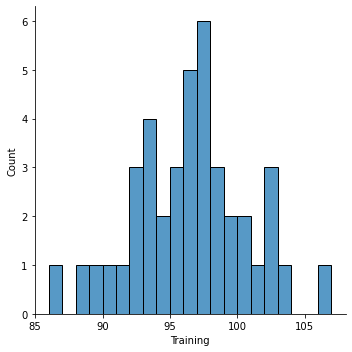

In [25]:
sns.displot(dist_dataframe, x='Training', binwidth=1)

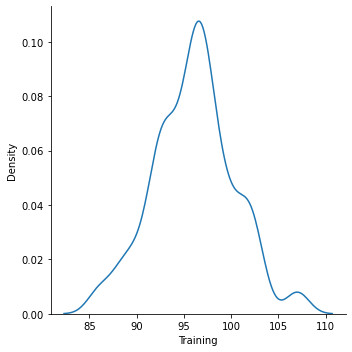

In [38]:
sns.displot(dist_dataframe, x='Training', kind="kde", bw_adjust=0.6)

In [14]:
dist_dataframe.to_csv('./data/disease_distribution.csv')